In [5]:
import numpy as np
import pandas as pd
df = pd.read_excel("D:\\ExcelR Assignments\\Assignment 14\\glass.xlsx",sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
# As we see there are no missing values in the given dataset.

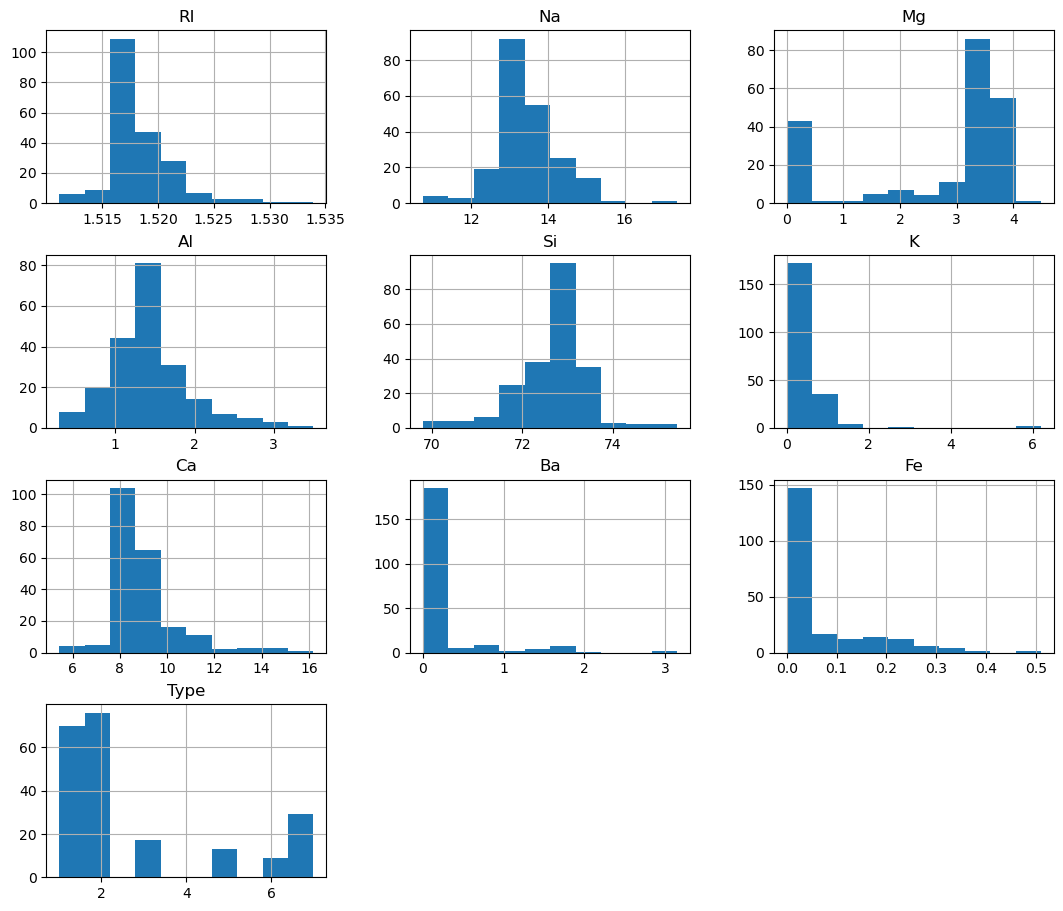

In [21]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
df.hist(figsize=(13, 11))
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Type', axis=1)  
y = df['Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#There are no categorical values in the dataset.
# So I am not going to use one hot encoding.
# There are some continuous variables.So I am going to use Standardization

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Bagging is already done using Random Forest

# Boosting using AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_boost = adaboost_model.predict(X_test)

# Evaluation
print("Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost))

Accuracy (AdaBoost): 0.4883720930232558
              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



C:\Users\tharu\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\tharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tharu\AppData\Roaming\Python\Python311\site-pac

Conclusion :

In [33]:
# As we see the accuracy score of Random forest classifier is 83%.
# The accuracy score of Adaboost is 48%
# From both the results we conclude that RandomForest is the best fit for the given dataset.

Additional Notes:

In [ ]:
'''
1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating) and Boosting are ensemble learning methods.
Bagging builds multiple models independently using bootstrapped subsets of the data (sampling with replacement).
It reduces variance by averaging predictions, making it robust to overfitting (e.g., Random Forest).
Boosting builds models sequentially, with each model improving on the errors of the previous one by focusing more on misclassified samples. 
It reduces bias, creating a strong model from weak learners (e.g., AdaBoost, Gradient Boosting).

Key Difference: Bagging reduces variance and builds models independently, while Boosting reduces bias by building models sequentially, 
                emphasizing harder-to-classify instances.



2. Explain how to handle imbalance in the data.

Handling imbalanced data involves techniques to ensure that minority and majority classes contribute equally to model training. 
Key approaches include:

Resampling:
    Oversampling: Duplicate or generate synthetic samples for the minority class (e.g., SMOTE).
    Undersampling: Reduce samples from the majority class to balance the dataset.
Class Weights:
    Assign higher weights to the minority class in the model's loss function to penalize misclassification.
Ensemble Methods: 
    Use models like Random Forest or Boosting that handle imbalance well.
Evaluation Metrics: 
    Focus on metrics like Precision, Recall, F1-score, and AUC-ROC instead of accuracy.
'''